### Problem 1 (50 points) 

Vapor-liquid equilibria data are correlated using two adjustable parameters $A_{12}$ and $A_{21}$ per binary
mixture. For low pressures, the equilibrium relation can be formulated as:

$$
\begin{aligned}
p = & x_1\exp\left(A_{12}\left(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{water}^{sat}\\
& + x_2\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{1,4 dioxane}^{sat}.
\end{aligned}
$$

Here the saturation pressures are given by the Antoine equation

$$
\log_{10}(p^{sat}) = a_1 - \frac{a_2}{T + a_3},
$$

where $T = 20$($^{\circ}{\rm C}$) and $a_{1,2,3}$ for a water - 1,4 dioxane
system is given below.

|             | $a_1$     | $a_2$      | $a_3$     |
|:------------|:--------|:---------|:--------|
| Water       | 8.07131 | 1730.63  | 233.426 |
| 1,4 dioxane | 7.43155 | 1554.679 | 240.337 |


The following table lists the measured data. Recall that in a binary system $x_1 + x_2 = 1$.

|$x_1$ | 0.0 | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0 |
|:-----|:--------|:---------|:--------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|
|$p$| 28.1 | 34.4 | 36.7 | 36.9 | 36.8 | 36.7 | 36.5 | 35.4 | 32.9 | 27.7 | 17.5 |

Estimate $A_{12}$ and $A_{21}$ using data from the above table: 

1. Formulate the least square problem; 
2. Since the model is nonlinear, the problem does not have an analytical solution. Therefore, solve it using the gradient descent or Newton's method implemented in HW1; 
3. Compare your optimized model with the data. Does your model fit well with the data?



[1.9584177 1.6891866]
0.00071549066
A_12= 1.9584177
A_21= 1.6891866
loss= 0.00071549066
Checking model vs. experimental data (experimental p, modeled p, difference
p experimental= 28.1 & p model= 28.824099527405245 difference -0.7240995274052437
p experimental= 34.4 & p model= 34.64430983581709 difference -0.24430983581709143
p experimental= 36.7 & p model= 36.452964624211475 difference 0.24703537578852774
p experimental= 36.9 & p model= 36.86731249815574 difference 0.03268750184425784
p experimental= 36.8 & p model= 36.87400708532342 difference -0.07400708532342293
p experimental= 36.7 & p model= 36.74983136261855 difference -0.049831362618547814
p experimental= 36.5 & p model= 36.390446913894365 difference 0.10955308610563463
p experimental= 35.4 & p model= 35.38482080704233 difference 0.015179192957667453
p experimental= 32.9 & p model= 32.94778400610805 difference -0.04778400610805278
p experimental= 27.7 & p model= 27.730002077430925 difference -0.03000207743092531
p experimental=

Text(0.5, 1.0, 'Vapor Liquid equilibria - Experimental Vs. OLS Model Fit ')

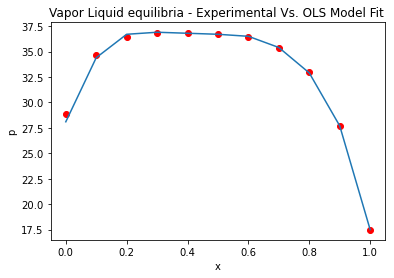

In [6]:
# Here is a code for gradient descent without line search
import numpy as np
import math as m
import torch as t
from torch.autograd import Variable
from line_search_bt import *
import matplotlib.pyplot as plt

T=20

a_water=np.array([8.07131,1730.63,233.426])
a_dioxane=np.array([7.43155,1554.679,240.337])

x1=np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
x2=1-x1

p=np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])

def p_specific(a,T):
   return 10**(a[0]-((a[1])/(T+a[2])))

pwater=((p_specific(a_water,T)))
pdioxane=((p_specific(a_dioxane,T)))

x = Variable(t.tensor([1.0, 1.0]), requires_grad=True)

# step size 
a = 0.001

#create a check variable
pcheck_str=[]

# gradient descent
for i in range(100): 
    for i in range(0,len(x1)):
        
        loss = (((x1[i]*pwater*t.exp(x[0]*((x[1]*x2[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)) + (x2[i]*pdioxane*t.exp( x[1]*((x[0]*x1[i])/(x[0]*x1[i]+x[1]*x2[i]))**2))) - p[i])**2
    
        loss.backward()
    x.grad.numpy()
    
    with t.no_grad():
        
        x -= a * x.grad
        
        # clear gradient
        x.grad.zero_()

sol=x.data.numpy()
print(x.data.numpy())
print(loss.data.numpy())

print('A_12=',sol[0])
print('A_21=',sol[1])
print('loss=',loss.data.numpy())


print('Checking model vs. experimental data (experimental p, modeled p, difference')
for i in range(0,len(p)):
   pcheck = ((x1[i]*pwater*m.exp(x[0]*((x[1]*x2[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)) + (x2[i]*pdioxane*m.exp( x[1]*((x[0]*x1[i])/(x[0]*x1[i]+x[1]*x2[i]))**2)))
   pcheck_str.append(pcheck)
   print("p experimental=",p[i], "&", "p model=",pcheck, "difference" , p[i]-pcheck)



plt.plot(x1,pcheck_str,'ro',x1,p)
plt.xlabel('x')
plt.ylabel('p')
plt.title('Vapor Liquid equilibria - Experimental Vs. OLS Model Fit ')


Discussion:
From inspection we can see that using OLS to evaluate the two constants is a viable method and the model fity quite well wehn compared to the experimatal data both in shape and magnitude. 

### Problem 2 (50 points) 

Solve the following problem using Bayesian Optimization:
$$
    \min_{x_1, x_2} \quad \left(4-2.1x_1^2 + \frac{x_1^4}{3}\right)x_1^2 + x_1x_2 + \left(-4 + 4x_2^2\right)x_2^2,
$$
for $x_1 \in [-3,3]$ and $x_2 \in [-2,2]$. A tutorial on Bayesian Optimization can be found [here](https://thuijskens.github.io/2016/12/29/bayesian-optimisation/).



To understand the funtion first I plotted the surface of the problem and evaluated the minimum vaule. The code below shows the surface plot and marks the calculated minimum using a red marker. 

This step was done to better understand the topology of the systme and provide insight oin performance of the Bayesian Optimization solver. 

[-0.090301    0.71571906]


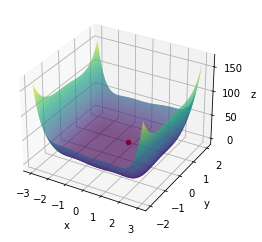

In [7]:
import numpy as np 
import sklearn 
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt
from gp import*
from plotters import*
from matplotlib import rc

def sample_loss(x):
    return (4-2.1*x[0]**2+((x[0]**4)/3))*x[0]**2+x[0]*x[1]+(-4+4*x[1]**2)*x[1]**2

x = np.linspace(-3, 3, 300)
y = np.linspace(-2, 2, 300)

# We need the cartesian combination of these two vectors
param_grid = np.array([(x_, y_) for x_ in x for y_ in y])

real_loss = [sample_loss(z) for z in param_grid]
z=np.array(real_loss)# The maximum is at:
mini=param_grid[np.array(real_loss).argmin(), :]


X, Y = np.meshgrid(x, y)
Z = sample_loss([X,Y])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.scatter(mini[0],mini[1],sample_loss(x=[mini[0],mini[1]]),marker = 'o',color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

print(mini)

The following code implimnets a Bayesian Optimization solving algorithym gb.py and plotters.py as coded by "Thomas Huijskens".   The top code o fthis function implements to solver to evaulate the system 

[ 2.18408631 -0.72191823]
-4.902647003928395


Text(0.5, 0, 'z')

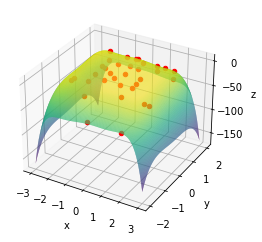

In [15]:
import numpy as np 
import sklearn 
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt
from gp import*
from plotters import*
%matplotlib inline

def sample_loss(x):
    return -((4-2.1*x[0]**2+((x[0]**4)/3))*x[0]**2+x[0]*x[1]+(-4+4*x[1]**2)*x[1]**2) 

x = np.linspace(-3, 3, 300)
y = np.linspace(-2, 2, 300)

n_iters=30
bounds=np.array([[-3,3], [-2,2]])

#xp, yp = bayesian_optimisation(n_iters, sample_loss, bounds,random_search=10000)

#xp,yp=bayesian_optimisation(n_iters, sample_loss, bounds,[[0,0],[.1,0],[-.1,0],[-.2,.2]], gp_params=None, random_search=False, alpha=1e-6, epsilon=1e-11)
xp,yp=bayesian_optimisation(n_iters, sample_loss, bounds,x0=None, gp_params=None, random_search=False, alpha=1e-10, epsilon=1e-11)

s=len(xp)

x_sol=xp[s-1]

sol=sample_loss(x_sol)

print(x_sol)
print(sol)

X, Y = np.meshgrid(x, y)
Z = sample_loss([X,Y])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

for i in range(0,len(xp)-1):
    ax.scatter(xp[i,0],xp[i,1],yp[i],marker = 'o',color='r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Discussion:

From invesigation we see that majority of sample point cluster in the basin of the funciton. It is observed that the function experiences a large area that with very small curvature which may lead the Baysian Solver to not converge as cleanly to a point .

[-0.54449257 -0.70414342]
-0.7922901136948743


Text(0.5, 0, 'z')

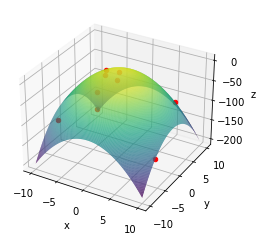

In [18]:
import numpy as np 
import sklearn 
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt
from gp import*
from plotters import*
%matplotlib inline

def sample_loss(x):
    return -(x[0]**2+x[1]**2)

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)

n_iters=5
bounds=np.array([[-10,10], [-10,10]])

#xp, yp = bayesian_optimisation(n_iters, sample_loss, bounds,random_search=10000)

#xp,yp=bayesian_optimisation(n_iters, sample_loss, bounds,[[0,0],[.1,0],[-.1,0],[-.2,.2]], gp_params=None, random_search=False, alpha=1e-6, epsilon=1e-11)
xp,yp=bayesian_optimisation(n_iters, sample_loss, bounds,x0=None, gp_params=None, random_search=False, alpha=1e-6, epsilon=1e-11)

s=len(xp)

x_sol=xp[s-1]

sol=sample_loss(x_sol)

print(x_sol)
print(sol)

X, Y = np.meshgrid(x, y)
Z = sample_loss([X,Y])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

for i in range(0,len(xp)-1):
    ax.scatter(xp[i,0],xp[i,1],yp[i],marker = 'o',color='r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')